# Training Linear Models

$$\hat{y} = h_{\theta}(\boldsymbol{x}) = \theta \cdot \boldsymbol{x}$$


Create a function and a feature vector to show examples

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of instances to create
m = 100

# Create a column vector for the feature
X = 2 * np.random.rand(m, 1)

# Create a function with some random noise
y = 4 + 3*X + np.random.randn(m, 1)

In [3]:
def scatter_plot(X, y, X_new = None, y_predict = None):
    if X_new is not None and y_predict is not None:
        plt.plot(X_new, y_predict, "r-", label="Predictions")
    plt.scatter(x=X, y=y)
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    # plt.axis([0, 2, 0, 15])
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

In [4]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

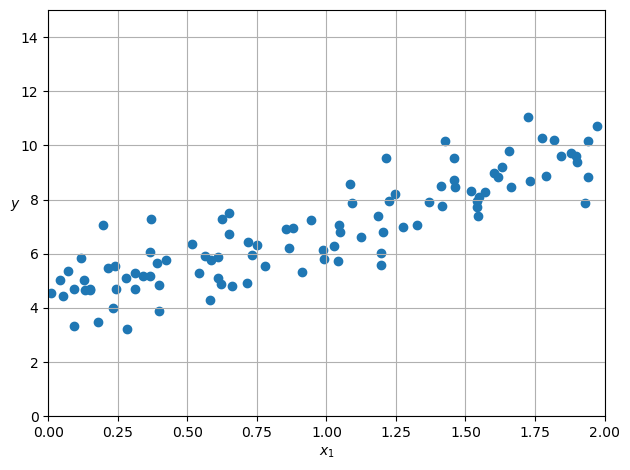

In [5]:
plt.scatter(x=X, y=y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
plt.close()

In [7]:
# We can setup our own computations for the regression coefficients
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # Prepends a column vector of all 1s for the first constant term x_0
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

Notice how the dummy feature method added the column vector with all 1's so that we can use this with our linear combinations. We can use this along with the normal equation to calculate the best $\theta$, or $\hat{x}$, for the problem.


# $$\hat{\theta} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

Where $\boldsymbol{X}$ is a matrix of with dimensions $m \times n$

In [8]:
# We can use the linear algebra library of numpy for these calcs
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

While we don't get the exact coefficients, we still get close. This is due in part to the fact that we must consider the irreducible error for the system we're trying to solve. The irreducible error is also referred to as $\epsilon$

In [9]:
# We can use theta to try and make predictions on new feature sets
X_new = np.array([[0], [2], [4]])

# I believe the author chooses b to represent the bias term with the 1, as it will be the coeff of \theta_0
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.],
       [1., 4.]])

In [10]:
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.21509616],
       [ 9.75532293],
       [15.2955497 ]])

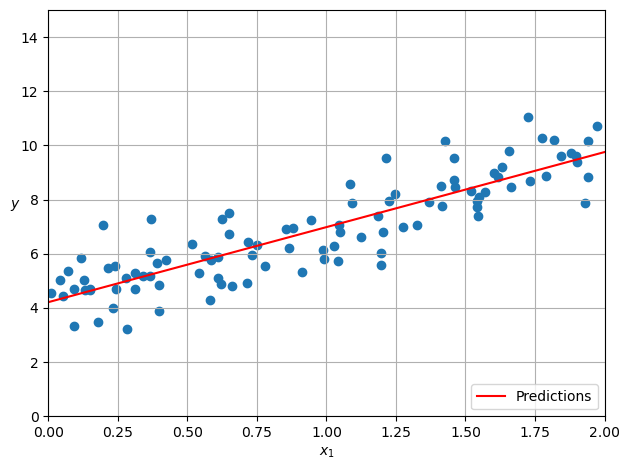

In [11]:
# We can plot against the original datapoints to see how close our fit is
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(x=X, y=y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
# We can accomplish the exact same thing with the base LinReg model from sklearn
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293],
       [15.2955497 ]])

Notice that we come up with the exact same fit. This is because the Linear Regression approach is formulaic, always using the normal equation to fit the best line to the data. This is grounded in the concepts of column spaces and projections from Linear Algebra.

To say that sklearn uses the exact same method would be incorrect. Sklearn uses an alternate method and calculates the *pseudoinverse* of $X$. More specifically this is the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). Computationally more efficient when dealing with large N, as well as handling edge cases where an invertible matrix may not exist.

**Caveats: Both methods chug on large data sets on the order of > 100,000**

# Gradient Descent to the Rescue

Better option for large data sets.

- Generic optimization algorithm that can apply to a wide range of problem classes

In [14]:
# Simple SGD with a basic learning schedul

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        # TODO you could plot the line defined by theta at each step to see progress
        theta = theta - eta * gradients

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
# Or we can use sklearn impl
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial Regression


We can use polynomial regression to fit our approximation function, $\hat{f}(x) = \hat{y}$ to the data points if we believe the relationship to be non-linear.

***NOTE: We don't want to arbitrarily increase the degree of polynomial for better in-sample scores. Overfitting should be a big consideration here.***

In [18]:
# Generate some non-linear data and plot it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


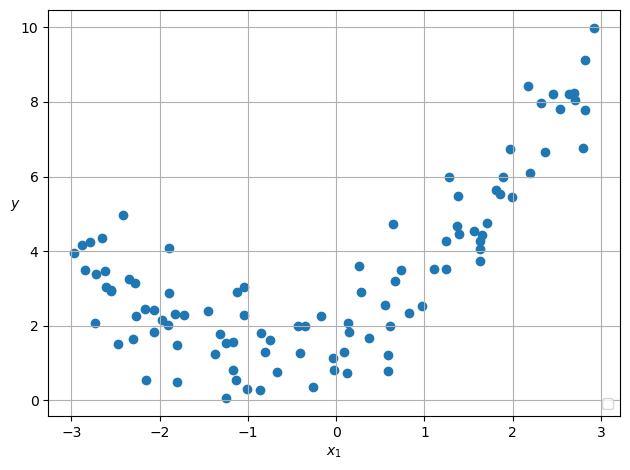

In [19]:
scatter_plot(X, y)

In [20]:
# Get a polynomial fitter, we could just use polyfit tbh
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

The amazing thing here is that this still just uses the normal equation.

$$A^TA\hat{x} = A^Tb$$

$$
\begin{equation}
A $=
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2
\end{bmatrix}
\end{equation}

$$

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [22]:
y_new = lin_reg.predict(X_poly)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


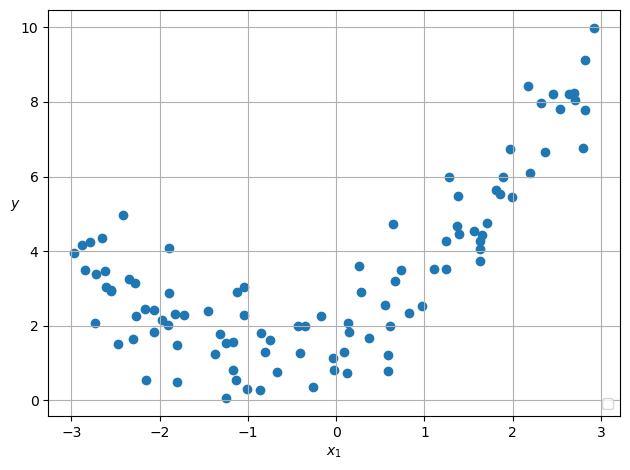

In [23]:
scatter_plot(X, y)

In [24]:
y_new

array([[1.39842532],
       [8.43499142],
       [4.17485459],
       [2.53185804],
       [2.25918793],
       [2.25939008],
       [3.27484983],
       [6.55784665],
       [2.55559366],
       [3.82689353],
       [3.76696465],
       [8.90169299],
       [5.88989222],
       [1.85167304],
       [2.05645803],
       [2.0449286 ],
       [1.46355599],
       [1.93248803],
       [1.49423227],
       [1.49764679],
       [2.66222542],
       [2.40322072],
       [1.49502331],
       [1.3956771 ],
       [1.57447195],
       [5.03178213],
       [1.93207743],
       [1.86520541],
       [2.47263182],
       [3.42140098],
       [2.61888173],
       [2.14190381],
       [3.18970382],
       [8.39130997],
       [8.79638932],
       [5.44200996],
       [1.46268375],
       [2.81734047],
       [3.50326369],
       [1.51887514],
       [2.56742224],
       [1.75479958],
       [3.57916148],
       [7.47955479],
       [1.61263738],
       [3.22863242],
       [1.44709879],
       [1.901

In [53]:
my_coeffs = np.append(lin_reg.intercept_, lin_reg.coef_)
my_coeffs[::-1]

array([0.56456263, 0.93366893, 1.78134581])

In [54]:
domain = np.linspace(-3, 3)
y_polys = np.polyval(my_coeffs[::-1], domain)
y_polys

array([4.06140272, 3.76941373, 3.49435456, 3.23622522, 2.99502571,
       2.77075602, 2.56341615, 2.37300611, 2.1995259 , 2.04297551,
       1.90335494, 1.7806642 , 1.67490328, 1.58607219, 1.51417093,
       1.45919949, 1.42115787, 1.40004608, 1.39586411, 1.40861197,
       1.43828965, 1.48489716, 1.54843449, 1.62890165, 1.72629864,
       1.84062544, 1.97188208, 2.12006853, 2.28518482, 2.46723093,
       2.66620686, 2.88211262, 3.1149482 , 3.36471361, 3.63140884,
       3.91503389, 4.21558878, 4.53307348, 4.86748802, 5.21883237,
       5.58710655, 5.97231056, 6.37444439, 6.79350805, 7.22950153,
       7.68242484, 8.15227797, 8.63906092, 9.14277371, 9.66341631])

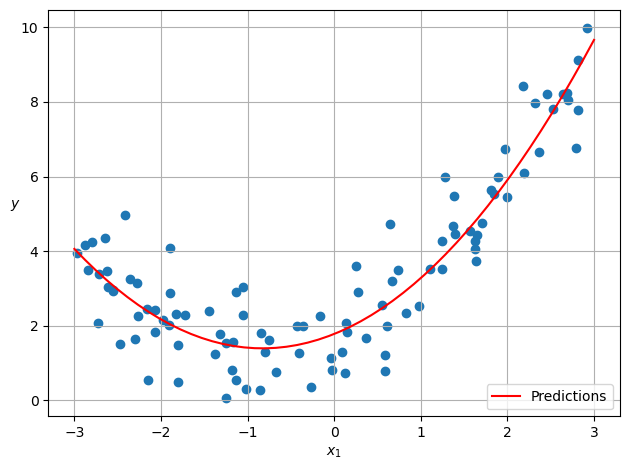

In [55]:
scatter_plot(X, y, domain, y_polys)